In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [27]:
data=pd.read_csv('D:/ML MINI PROJECT/NFLX.csv')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [28]:
data['Date'] = data.index
data['Return'] = data['Adj Close'].pct_change()
data.dropna(inplace=True)

In [29]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Adj Close']

VOLUME OF STOCKS OVER TIME


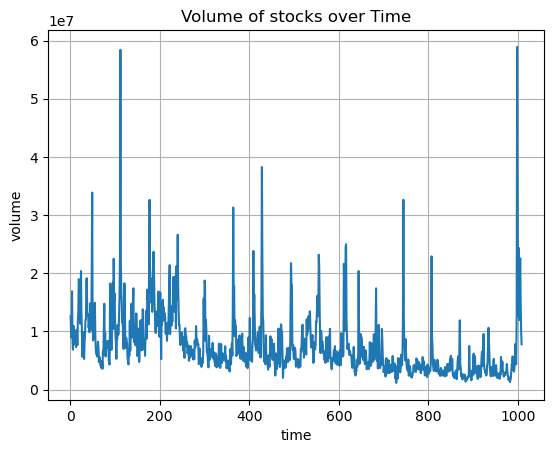

CLOSE PRICE


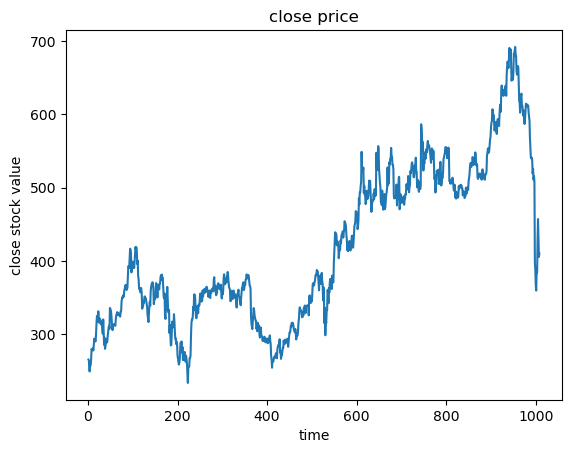

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import metrics 
print("VOLUME OF STOCKS OVER TIME")
plt.plot(data['Date'],data['Volume'])
plt.grid(True) 
plt.title("Volume of stocks over Time")
plt.xlabel('time')
plt.ylabel('volume')
plt.show() 

print("CLOSE PRICE")
plt.plot(data['Close'])
plt.title("close price")
plt.xlabel('time')
plt.ylabel('close stock value')
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
predictions = model.predict(X_test)

In [32]:
def predict_user_input(open_val, high_val, low_val, volume_val):
    user_data = pd.DataFrame({
        'Open': [open_val],
        'High': [high_val],
        'Low': [low_val],
        'Volume': [volume_val]
    })
    prediction = model.predict(user_data)
    return prediction[0]

open_val = float(input("ENTER OPEN VALUE : "))
high_val = float(input("ENTER HIGH VALUE : "))
low_val = float(input("ENTER LOW VALUE : "))
volume_val = float(input("ENTER VOLUME VALUE : "))

predicted_value = predict_user_input(open_val, high_val, low_val, volume_val)
print(f'Predicted Adjusted Close value: {predicted_value}')


ENTER OPEN VALUE :  262
ENTER HIGH VALUE :  267
ENTER LOW VALUE :  250
ENTER VOLUME VALUE :  1189648


Predicted Adjusted Close value: 255.5060897936118


In [33]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [34]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 17.000829434643332
R-squared: 0.9985644595791439
